In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

(480, 465, 3)

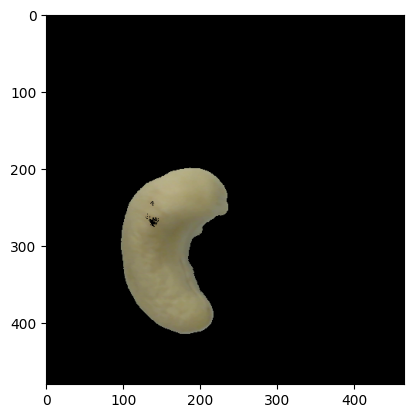

In [2]:
dog2 = cv2.imread('mask_cashew/test/320/2.png')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)
plt.imshow(dog2)
dog2.shape

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [5]:
image_gen.flow_from_directory('mask_cashew/train')

Found 232 images belonging to 2 classes.


In [6]:
image_gen.flow_from_directory('mask_cashew/test')

Found 98 images belonging to 2 classes.


In [7]:
# width,height,channels
image_shape = (150,150,3)

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(64))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 64)      

In [23]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('mask_cashew/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 232 images belonging to 2 classes.


In [24]:
test_image_gen = image_gen.flow_from_directory('mask_cashew/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'320': 0, '400': 1}

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=12,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
12/12 [==============================] - 3s 244ms/step - loss: 0.7107 - accuracy: 0.5217 - val_loss: 0.6848 - val_accuracy: 0.6224
Epoch 2/100
12/12 [==============================] - 2s 160ms/step - loss: 0.6898 - accuracy: 0.5489
Epoch 3/100
12/12 [==============================] - 2s 162ms/step - loss: 0.6723 - accuracy: 0.6141
Epoch 4/100
12/12 [==============================] - 2s 158ms/step - loss: 0.6692 - accuracy: 0.6250
Epoch 5/100
12/12 [==============================] - 2s 161ms/step - loss: 0.6590 - accuracy: 0.6250
Epoch 6/100
12/12 [==============================] - 2s 169ms/step - loss: 0.6508 - accuracy: 0.6198
Epoch 7/100
12/12 [==============================] - 2s 171ms/step - loss: 0.6236 - accuracy: 0.6667
Epoch 8/100
12/12 [==============================] - 2s 164ms/step - loss: 0.5794 - accuracy: 0.6902
Epoch 9/100
12/12 [==============================] - 2s 164ms/step - loss: 0.5488 - accuracy: 0.7500
Epoch 10/100
12/12 [=============================

In [29]:
model.save('cashew_320_400.h5')

0.8804348111152649


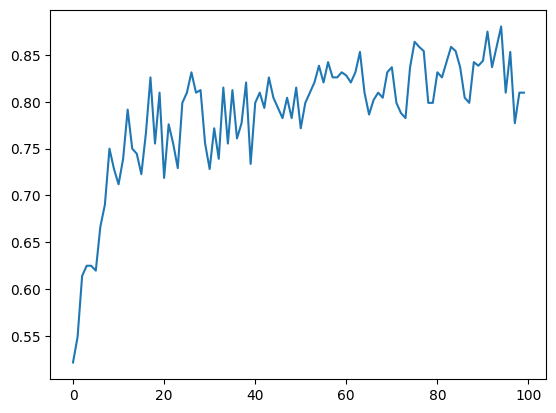

In [31]:
plt.plot(results.history['accuracy'])
print(max(results.history['accuracy']))

In [32]:
train_image_gen.class_indices

{'320': 0, '400': 1}

In [55]:
import numpy as np
import keras.utils as image
t=0
f=0
r=180
# r=150
for i in range(r):
    cnn_file = 'knn_mask_cashew/train/400/'+str(i)+'.png'
    # cnn_file = 'knn_mask_cashew/train/320/'+str(i)+'.png'
    cnn_img = image.load_img(cnn_file, target_size=(150, 150))
    cnn_img = image.img_to_array(cnn_img)
    cnn_img = np.expand_dims(cnn_img, axis=0)
    cnn_img = cnn_img/255
    prediction_prob = model.predict(cnn_img,verbose=0)
    if (prediction_prob[0][0]>0.5):
    # if (prediction_prob[0][0]<0.5):
        # print('True')
        t+=1
    else:
        print('False',i,prediction_prob[0][0])
        f+=1
print(t)
print(f)
print(t/(t+f))

False 77 0.45338303
False 103 0.4737322
False 110 0.43306813
False 119 0.26176578
False 158 0.3490358
False 162 0.1806661
174
6
0.9666666666666667
